# DATA 1202 - Data Analysis Tools for Analytics
## Final Project - Data Performance and Roadmap
### Ibrahima Sheik Mohamed M [ID: 100781252]
*DCFall2020                     December 18, 2020*

### Step 1: Loading Required Libraries and Dataset

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# Reading csv file into a pandas dataframe
sales_raw = pd.read_csv("sales.csv")

# Printing the first few rows
print(sales_raw.head())

   Unnamed: 0  store_id type  department_id        date  weekly_sales  \
0           0         1    A              1  2010-02-05      24924.50   
1           1         1    A              1  2010-03-05      21827.90   
2           2         1    A              1  2010-04-02      57258.43   
3           3         1    A              1  2010-05-07      17413.94   
4           4         1    A              1  2010-06-04      17558.09   

   is_holiday  temperature_c  fuel_price_usd_per_l  unemployment  
0       False       5.727778              0.679451         8.106  
1       False       8.055556              0.693452         8.106  
2       False      16.816667              0.718284         7.808  
3       False      22.527778              0.748928         7.808  
4       False      27.050000              0.714586         7.808  


### Step 2: Key Statistics of the Dataset
**a. Descriptive Statistics**

In [2]:
# Basic Descriptive Statistics of the dataset - for numeric columns
sales_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10774.0,5386.500000,3110.330234,0.000000,2693.250000,5386.500000,8079.750000,10773.000000
store_id,10774.0,15.441897,11.534511,1.000000,4.000000,13.000000,20.000000,39.000000
department_id,10774.0,45.218118,29.867779,1.000000,20.000000,40.000000,72.000000,99.000000
weekly_sales,10774.0,23843.950149,30220.387557,-1098.000000,3867.115000,12049.065000,32349.850000,293966.050000
temperature_c,10774.0,15.731978,9.922446,-8.366667,7.583333,16.966667,24.166667,33.827778
fuel_price_usd_per_l,10774.0,0.749746,0.059494,0.664129,0.708246,0.743381,0.781421,1.107674
unemployment,10774.0,8.082009,0.624355,3.879000,7.795000,8.099000,8.360000,9.765000


**b. Proportion of the categorical text variables**

In [3]:
# Printing the proportion of the categorical text variables
print("Column: Type")
print(sales_raw['type'].value_counts())

print("\nColumn: is_holiday")
print(sales_raw['is_holiday'].value_counts())

Column: Type
A    9872
B     902
Name: type, dtype: int64

Column: is_holiday
False    10732
True        42
Name: is_holiday, dtype: int64


**c. Correlation**

In [4]:
# Creating Correlation Matrix to view the relationship between the variables/ features
CorrMatrix = sales_raw.corr()
CorrMatrix

,Unnamed: 0,store_id,department_id,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
Unnamed: 0,1.000000,0.973574,0.084329,-0.027293,0.008774,-0.067656,0.183722,0.195395
store_id,0.973574,1.000000,0.002050,-0.053262,0.004964,-0.022461,0.107906,0.208977
department_id,0.084329,0.002050,1.000000,0.172872,0.039640,0.001031,0.092117,-0.030889
weekly_sales,-0.027293,-0.053262,0.172872,1.000000,-0.048118,-0.015548,-0.058900,0.047499
is_holiday,0.008774,0.004964,0.039640,-0.048118,1.000000,-0.025410,0.072431,-0.021394
temperature_c,-0.067656,-0.022461,0.001031,-0.015548,-0.025410,1.000000,-0.206472,0.028371
fuel_price_usd_per_l,0.183722,0.107906,0.092117,-0.058900,0.072431,-0.206472,1.000000,0.093359
unemployment,0.195395,0.208977,-0.030889,0.047499,-0.021394,0.028371,0.093359,1.000000


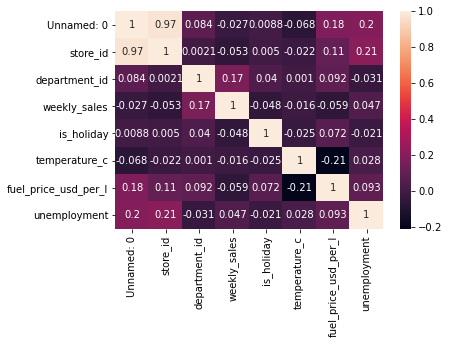

In [5]:
# Plotting the Correlation Matrix in graph
sn.heatmap(CorrMatrix, annot = True)
plt.show()

### Step 3: Data Quality Assessment
**a. Identifying NULL/ Missing values in the dataset**

In [6]:
# Making a list of missing value types
# Checking for missing values while importing the dataset and filling the null values as NaN
missing_values = ["n/a", "na", "--", "", " ", "NA", "N/A", "-"]
sales_check = pd.read_csv("sales.csv", na_values = missing_values)

In [7]:
# Summary about the dataframe
sales_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10774 non-null  int64  
 1   store_id              10774 non-null  int64  
 2   type                  10774 non-null  object 
 3   department_id         10774 non-null  int64  
 4   date                  10774 non-null  object 
 5   weekly_sales          10774 non-null  float64
 6   is_holiday            10774 non-null  bool   
 7   temperature_c         10774 non-null  float64
 8   fuel_price_usd_per_l  10774 non-null  float64
 9   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 768.2+ KB


In [8]:
# Total missing values for each feature
print("Total missing values for each feature\n", sales_check.isnull().sum())

# Any missing values?
print("\nDoes the dataset contain any missing value\n", sales_check.isnull().values.any())

# Total number of missing values
print("\nThe totalnumber of missing values if any:\n", sales_check.isnull().sum().sum())

Total missing values for each feature
 Unnamed: 0              0
store_id                0
type                    0
department_id           0
date                    0
weekly_sales            0
is_holiday              0
temperature_c           0
fuel_price_usd_per_l    0
unemployment            0
dtype: int64

Does the dataset contain any missing value
 False

The totalnumber of missing values if any:
 0


In [9]:
# Comparing the sum of value counts of each column with the length of the index to identify if there is any missing values
for cols in sales_check[:10]:   
    if sales_check[cols].value_counts().sum() == len(sales_check.index):
        print("\n The column ", cols, "in the dataset has NO missing values")
    else: 
        missing_count = len(sales_check.index) - sales_check[cols].value_counts().sum()
        print("\n The column ", cols, "in the dataset has", missing_count, " missing values") 


 The column  Unnamed: 0 in the dataset has NO missing values

 The column  store_id in the dataset has NO missing values

 The column  type in the dataset has NO missing values

 The column  department_id in the dataset has NO missing values

 The column  date in the dataset has NO missing values

 The column  weekly_sales in the dataset has NO missing values

 The column  is_holiday in the dataset has NO missing values

 The column  temperature_c in the dataset has NO missing values

 The column  fuel_price_usd_per_l in the dataset has NO missing values

 The column  unemployment in the dataset has NO missing values


**b. Detecting Outliers**

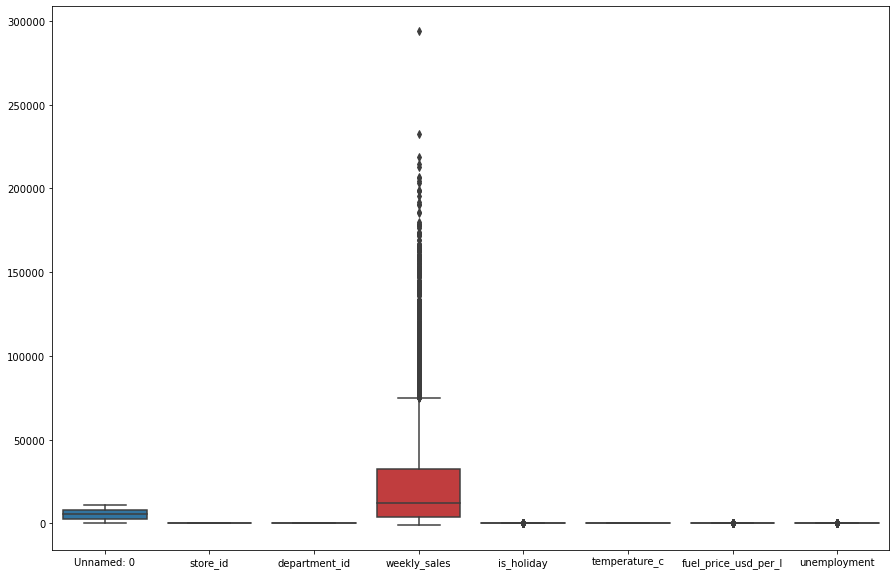

In [10]:
# Boxplot Visualization of outliers using seaborn
plt.figure(figsize = (15, 10))
sn.boxplot(data = sales_check)

*The overall box plot for the dataset shows that the columns weekly_sales, is_holiday, fuel_price_usd_per_l, and unemployment have outliers in it.*

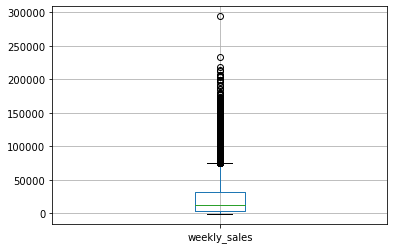

In [11]:
# Checking the outliers for weekly sales
sales_check.boxplot(column = ['weekly_sales'])

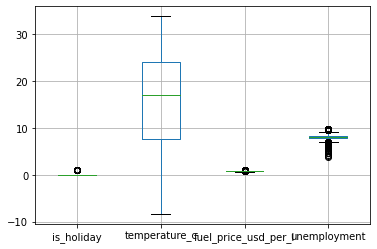

In [12]:
# Checking the outliers for 'is_holiday', 'temperature_c', 'fuel_price_usd_per_l', and 'unemployment'
sales_check.boxplot(column = ['is_holiday', 'temperature_c', 'fuel_price_usd_per_l', 'unemployment'])

**c. Detecting Duplicates**

In [13]:
# Selecting duplicate rows except first occurrence based on all columns
duplicateRowsDF = sales_check[sales_check.duplicated()]

print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Unnamed: 0, store_id, type, department_id, date, weekly_sales, is_holiday, temperature_c, fuel_price_usd_per_l, unemployment]
Index: []


*No Duplicate records or rows in the dataset*

In [14]:
# Checking for duplicate columns in the dataset
sales_check

,Unnamed: 0,store_id,type,department_id,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
...,...,...,...,...,...,...,...,...,...,...
10769,10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716
10770,10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244
10771,10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989
10772,10772,39,A,99,2012-07-13,0.06,False,25.644444,0.860145,6.623


*The first column unnamed: 0 in the dataset contains records similar to the index of the dataframe which can be considered as a duplicate*

### Step 4: Data Cleaning
**a. Removing Duplicate Column**

In [15]:
# Dropping the first Unnamed column as it has values same as the index values
sales_data = sales_check.drop("Unnamed: 0", axis = 1)
sales_data

,store_id,type,department_id,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
...,...,...,...,...,...,...,...,...,...
10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716
10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244
10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989
10772,39,A,99,2012-07-13,0.06,False,25.644444,0.860145,6.623


**b. Converting Data Types**

In [16]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store_id              10774 non-null  int64  
 1   type                  10774 non-null  object 
 2   department_id         10774 non-null  int64  
 3   date                  10774 non-null  object 
 4   weekly_sales          10774 non-null  float64
 5   is_holiday            10774 non-null  bool   
 6   temperature_c         10774 non-null  float64
 7   fuel_price_usd_per_l  10774 non-null  float64
 8   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 684.0+ KB


*The date column in the Pandas dataframe is stored as an object instead of datetime64[ns] datatype.*

In [17]:
# Converting the data type of column date to datetime64[ns]
sales_data['date'] = pd.to_datetime(sales_data['date'], format='%Y-%m-%d')
print(sales_data['date'].dtypes)

datetime64[ns]


In [18]:
sales_data

,store_id,type,department_id,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
...,...,...,...,...,...,...,...,...,...
10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716
10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244
10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989
10772,39,A,99,2012-07-13,0.06,False,25.644444,0.860145,6.623


**Creating additional columns for year, month and quarter for gathering meaningful insights**

In [19]:
# Creating additional columns for year, month and quarter for gathering meaningful insights
sales_data ['year'] = sales_data ['date'].dt.year
sales_data ['month'] = sales_data ['date'].dt.month
sales_data ['quarter'] = sales_data ['date'].dt.quarter
sales_data

,store_id,type,department_id,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment,year,month,quarter
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106,2010,2,1
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106,2010,3,1
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808,2010,4,2
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808,2010,5,2
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808,2010,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...
10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716,2011,12,4
10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244,2012,2,1
10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989,2012,6,2
10772,39,A,99,2012-07-13,0.06,False,25.644444,0.860145,6.623,2012,7,3


### Step 5: Key Insights
**a. Question 1**

**Which department items were the most and least preferred by the customers in the year 2011?**

*Answer to this question can be obtained by*

*1. Creating a boolean variable and filtering the dataframe based on year value 2011.*

*2. Using the boolean variable, creating a subset of dataframe by extracting the data for 2011 from the main dataframe sales_data.*

*3. Grouping the department_id using groupby function to the subset and computing the sales by department using sum() function.*

*4. Sorting the dataframe by dept_sales to obtain the most and least preferred department items.*

In [20]:
# Setting the option to display all the records from a dataframe
# pd.set_option('display.max_rows', None)

In [21]:
# Creating a boolean variable and filtering the dataframe based on year value 2011
is_2011 =  sales_data['year']==2011

# Using the boolian variable is_2011, creating a subset of dataframe for the year 2011
sales_data_2011 = sales_data[is_2011]
print(sales_data_2011)

       store_id type  department_id       date  weekly_sales  is_holiday  \
11            1    A              1 2011-01-07      15984.24       False   
23            1    A              2 2011-01-07      43202.29       False   
35            1    A              3 2011-01-07      15808.15       False   
47            1    A              4 2011-01-07      37947.80       False   
59            1    A              5 2011-01-07      22699.69       False   
...         ...  ...            ...        ...           ...         ...   
10762        39    A             98 2011-01-07       7666.71       False   
10766        39    A             99 2011-05-06         40.00       False   
10767        39    A             99 2011-08-19        622.00       False   
10768        39    A             99 2011-11-11         50.00       False   
10769        39    A             99 2011-12-09        895.00       False   

       temperature_c  fuel_price_usd_per_l  unemployment  year  month  quarter  
11    

In [22]:
# Applying groupby department_id to the subset and computing the sales by department
dept_sales_2011 = sales_data_2011.groupby(['department_id'])['weekly_sales'].sum().rename("dept_sales").reset_index()

# Sorting the dataframe by dept_sales to obtain the most and least preferred department items
dept_sales_2011.sort_values("dept_sales", ascending = False).reset_index()

,index,department_id,dept_sales
0,72,92,1615355.12
1,75,95,1244831.63
2,36,38,1102077.09
3,70,90,956618.13
4,38,40,905117.99
...,...,...,...
75,43,45,244.74
76,62,78,138.00
77,49,51,72.67
78,37,39,1.98


*It is clear from the above result that the items from departments 92, 95 and 38 were most preferred by the customers and items from departments 39 and 43 were least preferred by the customers in the year 2011. Departments 92, 95 and 38 could be related to essential items for living.*

**b. Question 2**

**What is the maximum and minimum temperature recorded in a month when the average monthly sales were maximum?**

*Answer to this question can be obtained by:*

*1. Grouping the dataframe by month and calculating the monthly average of sales, maximum temperature in each month and minimum temperature in each month.*

*2. Using merge function to merge the computed results (monthly_avg_sales, max_temp, and min_temp) to a single dataframe.*

*3. Sorting the dataframe by Avg_Sales to obtain the required result.*

In [23]:
# Grouping the dataframe by month and calculating the average of sales
monthly_avg_sales = sales_data.groupby(pd.Grouper(key = 'date', freq = 'M')
)['weekly_sales'].mean().rename("Avg_Sales").reset_index()
monthly_avg_sales

# Grouping the dataframe by month and calculating the maximum temperature in each month
max_temp = sales_data.groupby(pd.Grouper(key = 'date', freq = 'M')
)['temperature_c'].max().rename("Max_Temp").reset_index()

# Grouping the dataframe by month and calculating the minimum temperature in each month
min_temp = sales_data.groupby(pd.Grouper(key = 'date', freq = 'M')
)['temperature_c'].min().rename("Min_Temp").reset_index()

# Merging the computed results (monthly_avg_sales, max_temp, and min_temp) to a single dataframe
monthly_avg_sales = monthly_avg_sales.merge(max_temp)
monthly_avg_sales = monthly_avg_sales.merge(min_temp)

# Sorting the dataframe by Avg_Sales to obtain the required result
monthly_avg_sales.sort_values("Avg_Sales", ascending = False)

,date,Avg_Sales,Max_Temp,Min_Temp
2,2010-04-30,26233.064359,21.127778,5.638889
10,2010-12-31,25943.827959,15.083333,-3.444444
4,2010-06-30,25929.632923,32.400000,15.472222
0,2010-02-28,25687.334612,14.566667,-6.133333
3,2010-05-31,25051.821370,25.272222,6.900000
5,2010-07-31,24849.061556,33.827778,19.027778
6,2010-08-31,24653.145092,32.388889,22.616667
7,2010-09-30,24143.179197,29.861111,17.422222
9,2010-11-30,23847.001187,21.688889,5.433333
1,2010-03-31,23680.214688,14.900000,-0.138889


*It is evident from the above result that the average sales was maximum during the month April 2010 and the maximum and minimum temperature recorded during that month was 21.13 and 5.64, respectively.*

**c. Question 3**

*How well the sales have been in the stores in 2011 compared to the year 2010?*

*Answer to this question can be obtained by:*

*1. Grouping the dataframe by store_id and calculating the store-wise sales for the years 2010 and 2011.*

*2. Merging the dataframe to compute the store-wise difference in sales.*

*3. Computing the % difference in store sales between years 2010 and 2011.*

*4. Sorting the dataframe by % Diff*

In [24]:
# Creating a subset of dataframe with details 'year', 'store_id', and 'weekly_sales'
sales_sample = sales_data[['year', 'store_id', 'weekly_sales']]

# Grouping the dataframe by store_id and calculating the store-wise sales for the year 2010
sales_2010 = sales_sample[sales_sample['year'] == 2010].groupby(by = ['store_id'])['weekly_sales'].sum().rename("2010_sales").reset_index()

# Grouping the dataframe by store_id and calculating the store-wise sales for the year 2011
sales_2011 = sales_sample[sales_sample['year'] == 2011].groupby(by = ['store_id'])['weekly_sales'].sum().rename("2011_sales").reset_index()

# Merging the dataframe to compute the store-wise difference in sales
sales = sales_2010.merge(sales_2011)
sales

,store_id,2010_sales,2011_sales
0,1,17204284.61,1621956.94
1,2,22020058.71,1765054.59
2,4,21674292.29,1864841.14
3,6,17916839.11,1357275.58
4,10,21461998.89,1716416.98
5,13,21681195.82,1748535.59
6,14,25020054.64,1868484.26
7,19,16826867.68,1228995.61
8,20,23977117.52,1849997.96
9,27,20208958.21,1576301.24


In [25]:
# Computing the % difference in store sales between years 2010 and 2011
sales['Diff'] = sales['2011_sales'] - sales['2010_sales']
sales['% Diff'] = (sales['Diff'] / sales['2010_sales']) * 100
sales

,store_id,2010_sales,2011_sales,Diff,% Diff
0,1,17204284.61,1621956.94,-15582327.67,-90.572366
1,2,22020058.71,1765054.59,-20255004.12,-91.984333
2,4,21674292.29,1864841.14,-19809451.15,-91.396069
3,6,17916839.11,1357275.58,-16559563.53,-92.424581
4,10,21461998.89,1716416.98,-19745581.91,-92.002530
5,13,21681195.82,1748535.59,-19932660.23,-91.935244
6,14,25020054.64,1868484.26,-23151570.38,-92.532054
7,19,16826867.68,1228995.61,-15597872.07,-92.696231
8,20,23977117.52,1849997.96,-22127119.56,-92.284319
9,27,20208958.21,1576301.24,-18632656.97,-92.199988


In [26]:
# Sorting the dataframe by % Diff
sales.sort_values("% Diff", ascending = False)

,store_id,2010_sales,2011_sales,Diff,% Diff
0,1,17204284.61,1621956.94,-15582327.67,-90.572366
10,31,14864277.70,1315073.84,-13549203.86,-91.152790
2,4,21674292.29,1864841.14,-19809451.15,-91.396069
11,39,14881926.56,1228348.88,-13653577.68,-91.746036
5,13,21681195.82,1748535.59,-19932660.23,-91.935244
1,2,22020058.71,1765054.59,-20255004.12,-91.984333
4,10,21461998.89,1716416.98,-19745581.91,-92.002530
9,27,20208958.21,1576301.24,-18632656.97,-92.199988
8,20,23977117.52,1849997.96,-22127119.56,-92.284319
3,6,17916839.11,1357275.58,-16559563.53,-92.424581


*The above result shows that there has been a drastic decrease in store sales in 2011 when compared to the year 2010. Almost all the stores show similar trend of near 90% decrease in sales. There could be some serious reason behind this decrease which would require prompt action to be taken.*

**d. Question 4**

*Is there any interesting change in trend in unemployment rate and fuel price per litre?*

*Tableau Public URL: https://public.tableau.com/profile/ibrahima.sheik.mohamed#!/vizhome/Sales_16083252229010/Dashboard1?publish=yes*

*1.	From the graph, we could observe that the average unemployment rate has decreased considerably over the year while the Fuel Price Usd Per L seem to show a slight increase in 2012 when compared to 2010.*

*2.	This can be due to the fact that when unemployment rate decreases meaning people are getting job there comes a demand for more transit and fuel there causing the fuel price to increase.*